In [4]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ignorar warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../data/processed/complete_merged.csv')
df.head()


,Country,Year,Agricultural production index (2014-2016=100),"Balance of payments, current account (million US$)",CPI: Consumer Price Index (2010=100),Economy: Agriculture (% of Gross Value Added),Economy: Industry (% of Gross Value Added),Economy: Services and other activity (% of GVA),Employment in agriculture (% of employed),Employment in industry (% of employed),...,Capital city,Exchange rate (per US$),National currency,"Pop. density (per km2, 2024)","Population (000, 2024)",Region,Sex ratio (m per 100 f),Surface area (km2),UN membership date,Capital_city_pop
0,Afghanistan,2015.0,96.0,4193.0,133.0,22.0,9.6,68.3,44.6,20.7,...,Kabul,77.1,Afghani (AFN),65.7,42648.0,Southern Asia,102.0,652864.0,1946-11-19,4114.0
1,Afghanistan,2020.0,112.0,3137.0,150.0,31.4,13.6,55.0,46.0,18.5,...,Kabul,77.1,Afghani (AFN),65.7,42648.0,Southern Asia,102.0,652864.0,1946-11-19,4114.0
2,Afghanistan,2024.0,111.0,NaN,NaN,35.5,16.9,47.5,46.6,18.3,...,Kabul,77.1,Afghani (AFN),65.7,42648.0,Southern Asia,102.0,652864.0,1946-11-19,4114.0
3,Albania,2015.0,100.0,980.0,111.0,22.5,24.8,52.7,41.3,18.7,...,Tirana,93.9,Lek (ALL),101.9,2792.0,Southern Europe,97.8,28748.0,1955-12-14,484.6
4,Albania,2020.0,106.0,1315.0,121.0,21.9,22.9,55.1,36.2,20.6,...,Tirana,93.9,Lek (ALL),101.9,2792.0,Southern Europe,97.8,28748.0,1955-12-14,484.6


In [6]:
df["Life expectancy at birth - average"] = (df["Life expectancy at birth - Female (years)"] + df["Life expectancy at birth - Male (years)"])/2
df.head()

,Country,Year,Agricultural production index (2014-2016=100),"Balance of payments, current account (million US$)",CPI: Consumer Price Index (2010=100),Economy: Agriculture (% of Gross Value Added),Economy: Industry (% of Gross Value Added),Economy: Services and other activity (% of GVA),Employment in agriculture (% of employed),Employment in industry (% of employed),...,Exchange rate (per US$),National currency,"Pop. density (per km2, 2024)","Population (000, 2024)",Region,Sex ratio (m per 100 f),Surface area (km2),UN membership date,Capital_city_pop,Life expectancy at birth - average
0,Afghanistan,2015.0,96.0,4193.0,133.0,22.0,9.6,68.3,44.6,20.7,...,77.1,Afghani (AFN),65.7,42648.0,Southern Asia,102.0,652864.0,1946-11-19,4114.0,62.30
1,Afghanistan,2020.0,112.0,3137.0,150.0,31.4,13.6,55.0,46.0,18.5,...,77.1,Afghani (AFN),65.7,42648.0,Southern Asia,102.0,652864.0,1946-11-19,4114.0,61.60
2,Afghanistan,2024.0,111.0,NaN,NaN,35.5,16.9,47.5,46.6,18.3,...,77.1,Afghani (AFN),65.7,42648.0,Southern Asia,102.0,652864.0,1946-11-19,4114.0,66.25
3,Albania,2015.0,100.0,980.0,111.0,22.5,24.8,52.7,41.3,18.7,...,93.9,Lek (ALL),101.9,2792.0,Southern Europe,97.8,28748.0,1955-12-14,484.6,78.40
4,Albania,2020.0,106.0,1315.0,121.0,21.9,22.9,55.1,36.2,20.6,...,93.9,Lek (ALL),101.9,2792.0,Southern Europe,97.8,28748.0,1955-12-14,484.6,77.85


In [7]:
# Basic information about the dataset and target variable
print("Dataset shape:", df.shape)
print(f"\nTarget variable: Life expectancy at birth - average")
print(f"Target variable statistics:")
target_stats = df["Life expectancy at birth - average"].describe()
print(target_stats)
print(f"\nData types:")
print(df.dtypes.value_counts())
print(f"\nMissing values summary:")
print(df.isnull().sum().sum(), "total missing values")
print(f"{(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}% of data is missing")
print(f"\nTarget variable missing values: {df['Life expectancy at birth - average'].isnull().sum()}")
print(f"Available target observations: {df['Life expectancy at birth - average'].notna().sum()}")

Dataset shape: (696, 80)

Target variable: Life expectancy at birth - average
Target variable statistics:
count    690.000000
mean      73.065217
std        7.474043
min       39.900000
25%       67.912500
50%       74.400000
75%       78.450000
max       86.600000
Name: Life expectancy at birth - average, dtype: float64

Data types:
float64    75
object      5
Name: count, dtype: int64

Missing values summary:
10085 total missing values
18.11% of data is missing

Target variable missing values: 6
Available target observations: 690


# Exploratory Data Analysis for Life Expectancy Regression

## 1. Target Variable Analysis
Let's analyze the distribution and characteristics of our target variable `Life expectancy at birth - average`.

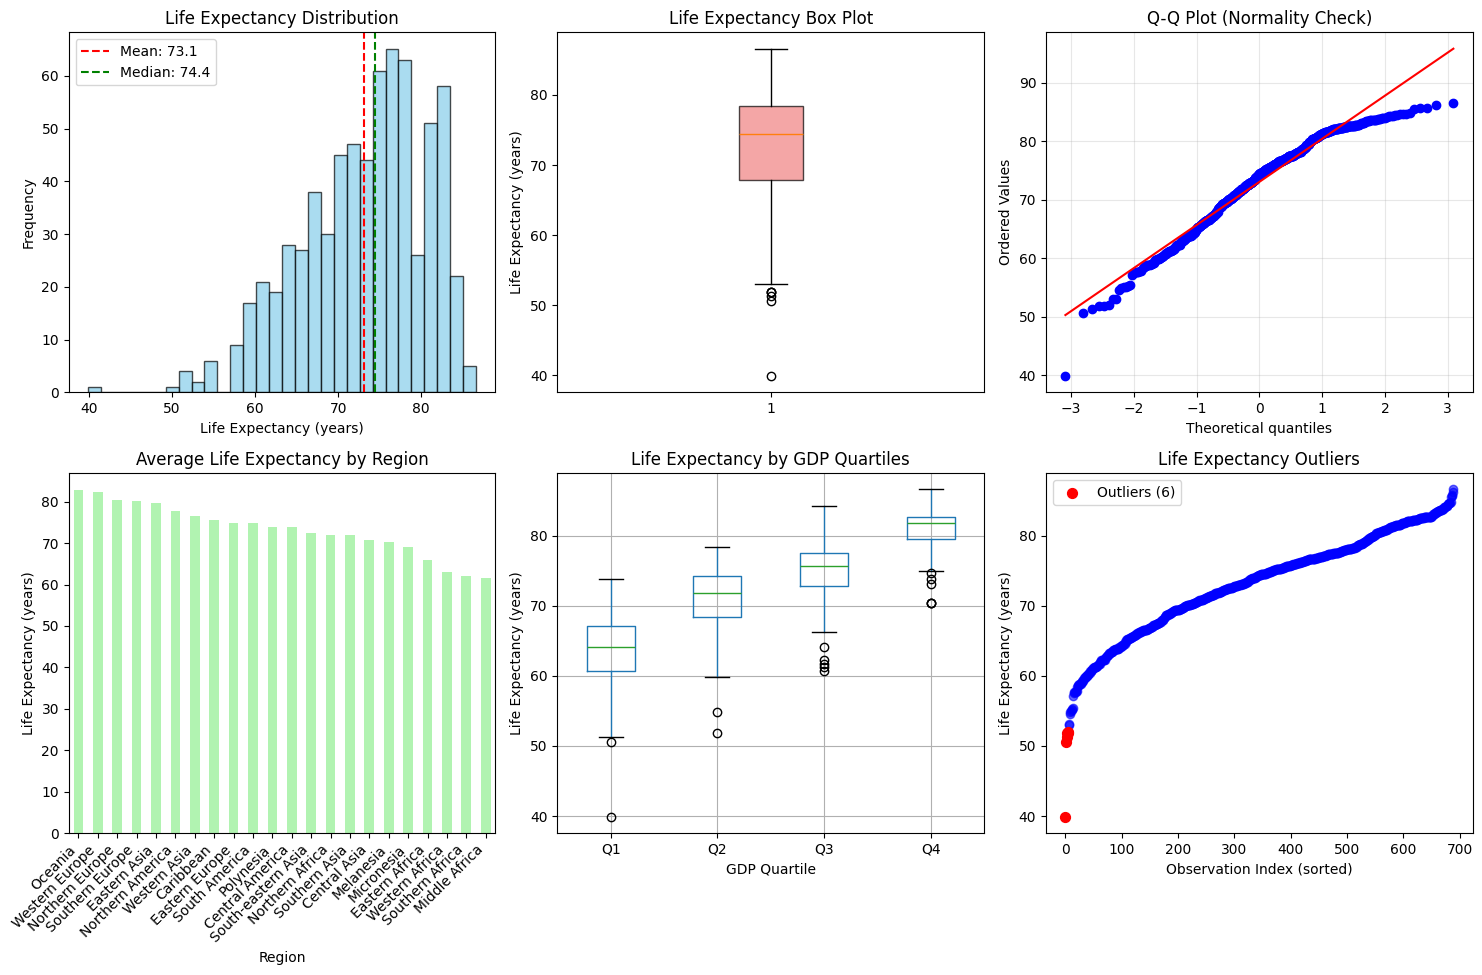


Target Variable Statistical Summary:
Mean: 73.07 years
Median: 74.40 years
Standard deviation: 7.47 years
Min: 39.90 years
Max: 86.60 years
Range: 46.70 years
Skewness: -0.629
Kurtosis: 0.090

Outliers detected: 6
Outlier countries: ['Central African Republic', 'Central African Republic', 'Chad', 'Lesotho', 'Nigeria', 'South Sudan']


In [8]:
# Target variable analysis
plt.figure(figsize=(15, 10))

# Life expectancy distribution
plt.subplot(2, 3, 1)
life_exp_clean = df["Life expectancy at birth - average"].dropna()
plt.hist(life_exp_clean, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.axvline(life_exp_clean.mean(), color='red', linestyle='--', label=f'Mean: {life_exp_clean.mean():.1f}')
plt.axvline(life_exp_clean.median(), color='green', linestyle='--', label=f'Median: {life_exp_clean.median():.1f}')
plt.legend()

# Box plot
plt.subplot(2, 3, 2)
plt.boxplot(life_exp_clean, patch_artist=True, 
            boxprops=dict(facecolor='lightcoral', alpha=0.7))
plt.title('Life Expectancy Box Plot')
plt.ylabel('Life Expectancy (years)')

# Q-Q plot for normality
plt.subplot(2, 3, 3)
from scipy import stats
stats.probplot(life_exp_clean, dist="norm", plot=plt)
plt.title('Q-Q Plot (Normality Check)')
plt.grid(True, alpha=0.3)

# Life expectancy by continent/region (if available)
plt.subplot(2, 3, 4)
region_life_exp = df.groupby('Region')["Life expectancy at birth - average"].mean().sort_values(ascending=False)
region_life_exp.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Average Life Expectancy by Region')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Life Expectancy (years)')
# Distribution by GDP quartiles
plt.subplot(2, 3, 5)
df_temp = df[df["Life expectancy at birth - average"].notna() & df['GDP per capita (current US$)'].notna()].copy()
df_temp['gdp_quartile'] = pd.qcut(df_temp["GDP per capita (current US$)"], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_temp.boxplot(column="Life expectancy at birth - average", by='gdp_quartile', ax=plt.gca())
plt.title('Life Expectancy by GDP Quartiles')
plt.suptitle('')  # Remove automatic title
plt.xlabel('GDP Quartile')
plt.ylabel('Life Expectancy (years)')

# Outliers analysis
plt.subplot(2, 3, 6)
Q1 = life_exp_clean.quantile(0.25)
Q3 = life_exp_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = life_exp_clean[(life_exp_clean < lower_bound) | (life_exp_clean > upper_bound)]

plt.scatter(range(len(life_exp_clean)), life_exp_clean.sort_values(), alpha=0.6, color='blue')
if len(outliers) > 0:
    outlier_indices = [list(life_exp_clean.sort_values()).index(x) for x in outliers if x in life_exp_clean.sort_values().values]
    plt.scatter(outlier_indices, outliers, color='red', s=50, label=f'Outliers ({len(outliers)})')
    plt.legend()
plt.title('Life Expectancy Outliers')
plt.xlabel('Observation Index (sorted)')
plt.ylabel('Life Expectancy (years)')

plt.tight_layout()
plt.show()

# Statistical summary
print(f"\nTarget Variable Statistical Summary:")
print(f"Mean: {life_exp_clean.mean():.2f} years")
print(f"Median: {life_exp_clean.median():.2f} years")
print(f"Standard deviation: {life_exp_clean.std():.2f} years")
print(f"Min: {life_exp_clean.min():.2f} years")
print(f"Max: {life_exp_clean.max():.2f} years")
print(f"Range: {life_exp_clean.max() - life_exp_clean.min():.2f} years")
print(f"Skewness: {life_exp_clean.skew():.3f}")
print(f"Kurtosis: {life_exp_clean.kurtosis():.3f}")
if len(outliers) > 0:
    print(f"\nOutliers detected: {len(outliers)}")
    print(f"Outlier countries: {list(df[df['Life expectancy at birth - average'].isin(outliers)]['Country'].values)}")
else:
    print(f"\nNo outliers detected using IQR method")

## 2. Missing Data Analysis
Understanding missing data patterns is crucial for regression modeling.

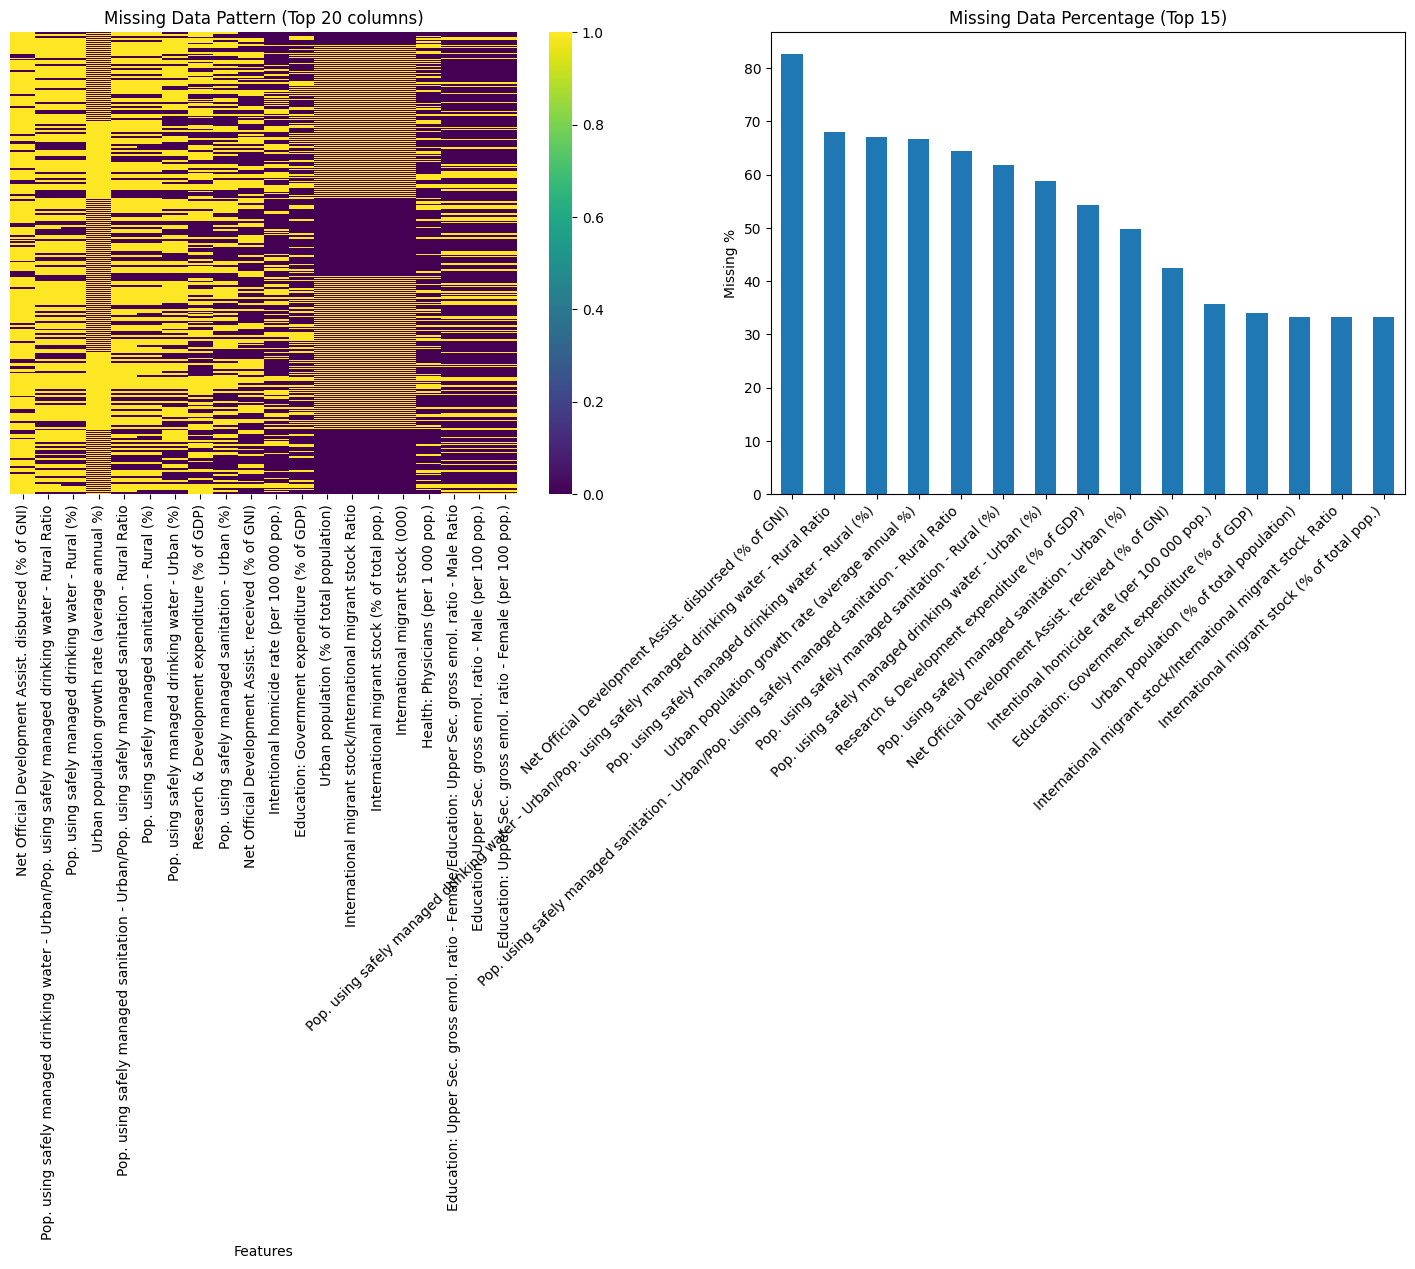

Features with most missing data:
Net Official Development Assist. disbursed (% of GNI)                                                      575
Pop. using safely managed drinking water - Urban/Pop. using safely managed drinking water - Rural Ratio    473
Pop. using safely managed drinking water - Rural (%)                                                       467
Urban population growth rate (average annual %)                                                            464
Pop. using safely managed sanitation - Urban/Pop. using safely managed sanitation - Rural Ratio            448
Pop. using safely managed sanitation - Rural (%)                                                           430
Pop. using safely managed drinking water - Urban (%)                                                       409
Research & Development expenditure (% of GDP)                                                              378
Pop. using safely managed sanitation - Urban (%)                               

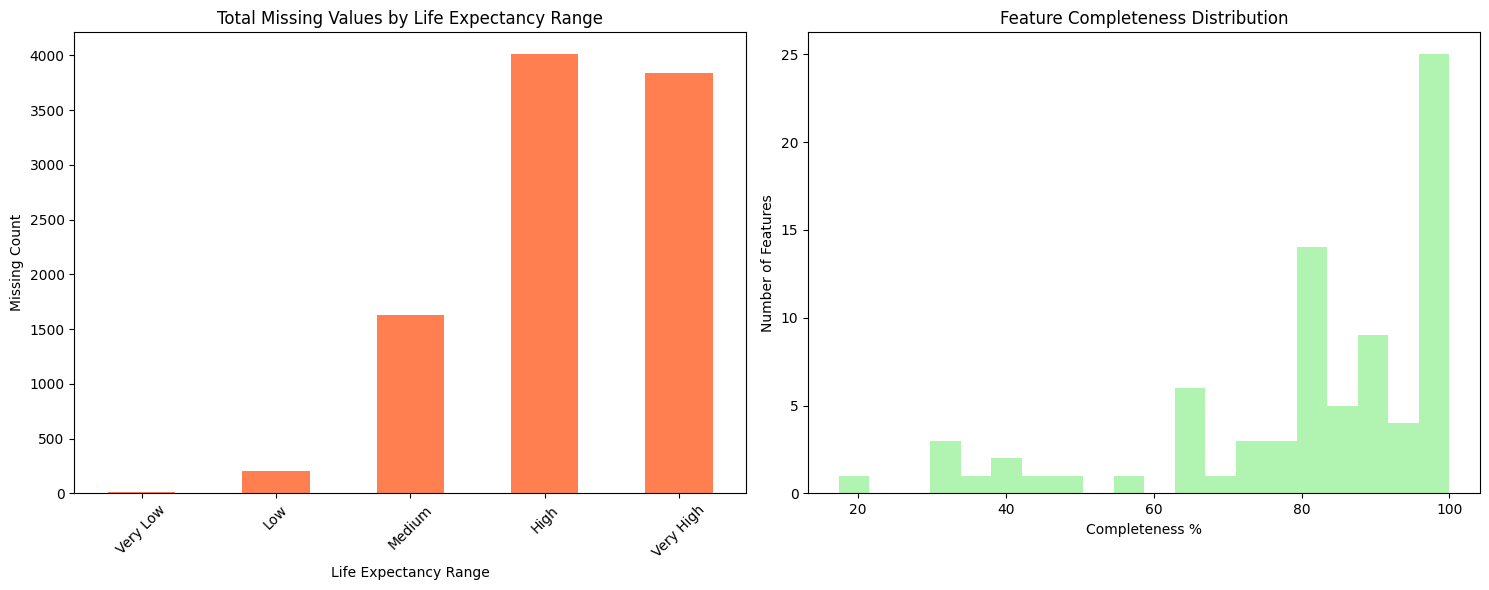

Features with >50% missing data: 8
Features with >90% completeness: 37
Target variable completeness: 99.1%


In [7]:
# Missing data analysis
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Missing Data Pattern and Percentage - Side by Side
plt.figure(figsize=(18, 6))

# Missing data heatmap
plt.subplot(1, 2, 1)
# Select columns with most missing data for visualization
top_missing_cols = missing_data.head(20).index
sns.heatmap(df[top_missing_cols].isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern (Top 20 columns)')
plt.xlabel('Features')

# Missing data bar plot
plt.subplot(1, 2, 2)
missing_pct = (missing_data.head(15) / len(df) * 100)
missing_pct.plot(kind='bar')
plt.title('Missing Data Percentage (Top 15)')
plt.ylabel('Missing %')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Features with most missing data:")
print(missing_data.head(10))

# Analyze missing data correlation with target variable
plt.figure(figsize=(15, 6))

# Missing data by life expectancy ranges
plt.subplot(1, 2, 1)
df_target = df[df["Life expectancy at birth - average"].notna()].copy()
df_target['life_exp_range'] = pd.cut(df_target["Life expectancy at birth - average"], 
                                    bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
missing_by_range = df_target.groupby('life_exp_range').apply(lambda x: x.isnull().sum().sum())
missing_by_range.plot(kind='bar', color='coral')
plt.title('Total Missing Values by Life Expectancy Range')
plt.xlabel('Life Expectancy Range')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)

# Feature completeness
plt.subplot(1, 2, 2)
completeness = (df.count() / len(df) * 100).sort_values()
plt.hist(completeness, bins=20, alpha=0.7, color='lightgreen')
plt.title('Feature Completeness Distribution')
plt.xlabel('Completeness %')
plt.ylabel('Number of Features')

plt.tight_layout()
plt.show()

print(f"Features with >50% missing data: {len(completeness[completeness < 50])}")
print(f"Features with >90% completeness: {len(completeness[completeness > 90])}")
print(f"Target variable completeness: {(df['Life expectancy at birth - average'].count() / len(df) * 100):.1f}%")

## 3. Feature Analysis and Correlation with Life Expectancy
Let's analyze how different features correlate with life expectancy.

Found 73 features with >30% completeness for correlation analysis

Top 20 features most correlated with Life Expectancy:
 1. Under five mortality rate (per 1000 live births)        | ↓ -0.884 | N: 690
 2. Fertility rate, total (live births per woman)           | ↓ -0.808 | N: 690
 3. Employment in agriculture (% of employed)               | ↓ -0.759 | N: 575
 4. Health: Physicians (per 1 000 pop.)                     | ↑  0.743 | N: 475
 5. Education: Upper Sec. gross enrol. ratio - Female (per  | ↑  0.725 | N: 517
 6. Education: Upper Sec. gross enrol. ratio - Male (per 10 | ↑  0.714 | N: 517
 7. Employment in services (% employed)                     | ↑  0.705 | N: 576
 8. Economy: Agriculture (% of Gross Value Added)           | ↓ -0.665 | N: 621
 9. GDP per capita (current US$)                            | ↑  0.595 | N: 630
10. Urban population (% of total population)                | ↑  0.570 | N: 460
11. Economy: Services and other activity (% of GVA)         | ↑  0.562 | N: 630

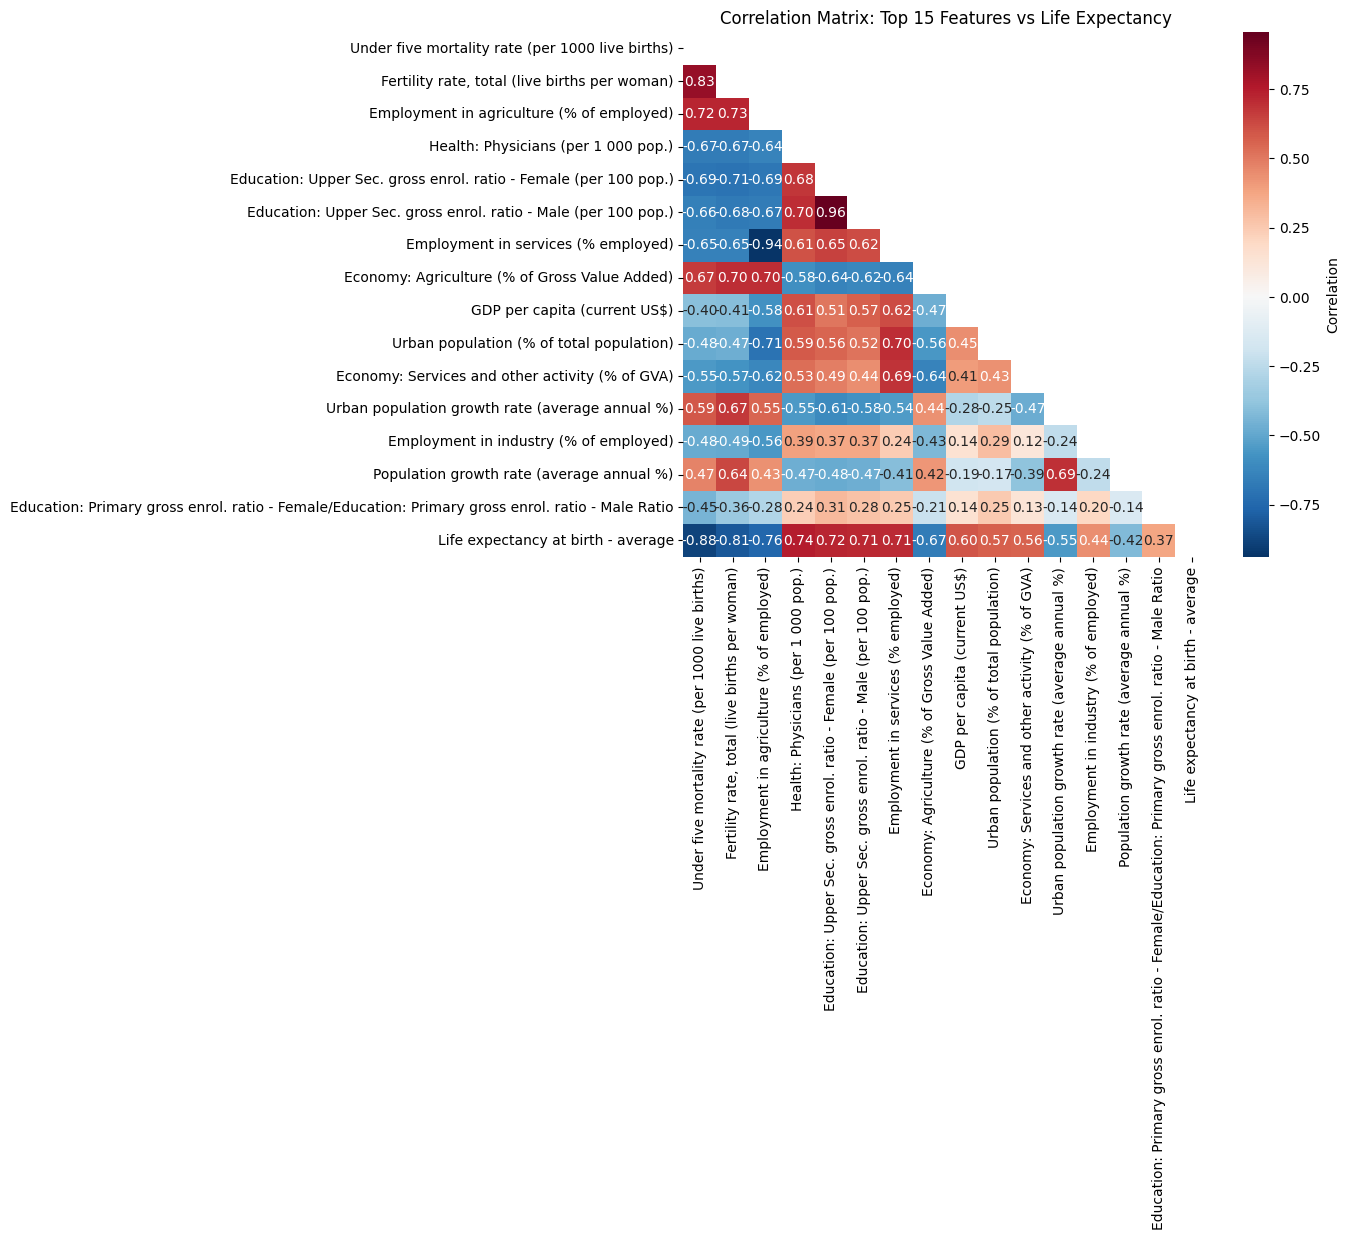


Top 10 Positive Correlations with Life Expectancy:
 1. Health: Physicians (per 1 000 pop.)                | +0.743 | N: 475
 2. Education: Upper Sec. gross enrol. ratio - Female  | +0.725 | N: 517
 3. Education: Upper Sec. gross enrol. ratio - Male (p | +0.714 | N: 517
 4. Employment in services (% employed)                | +0.705 | N: 576
 5. GDP per capita (current US$)                       | +0.595 | N: 630
 6. Urban population (% of total population)           | +0.570 | N: 460
 7. Economy: Services and other activity (% of GVA)    | +0.562 | N: 630
 8. Employment in industry (% of employed)             | +0.439 | N: 576
 9. Education: Primary gross enrol. ratio - Female/Edu | +0.373 | N: 561
10. International trade: exports (million current US$) | +0.281 | N: 633

Top 10 Negative Correlations with Life Expectancy:
 1. Under five mortality rate (per 1000 live births)   | -0.884 | N: 690
 2. Fertility rate, total (live births per woman)      | -0.808 | N: 690
 3. Employment in ag

In [13]:
# Correlation analysis with life expectancy
# Select numeric features with less than 70% missing data for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
complete_features = []
for col in numeric_cols:
    if col != "Life expectancy at birth - average" and df[col].notna().sum() / len(df) > 0.3:  # At least 30% complete
        complete_features.append(col)

print(f"Found {len(complete_features)} features with >30% completeness for correlation analysis")

# Calculate correlation with life expectancy
correlations = []
for feature in complete_features:
    clean_data = df[[feature, "Life expectancy at birth - average"]].dropna()
    if len(clean_data) > 10:  
        corr = clean_data[feature].corr(clean_data["Life expectancy at birth - average"])
        correlations.append((feature, corr, len(clean_data)))

# Sort by absolute correlation
correlations = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

# Display top correlations
print("\nTop 20 features most correlated with Life Expectancy:")
for i, (feature, corr, n_obs) in enumerate(correlations[:20]):
    direction = "↑" if corr > 0 else "↓"
    print(f"{i+1:2d}. {feature[:55]:<55} | {direction} {corr:6.3f} | N: {n_obs:3d}")

# Create correlation heatmap for top features
if len(correlations) >= 15:
    top_features = [item[0] for item in correlations[:15]] + ["Life expectancy at birth - average"]
    corr_matrix = df[top_features].corr()
    
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f',
                square=True, cbar_kws={'label': 'Correlation'}, mask=mask)
    plt.title('Correlation Matrix: Top 15 Features vs Life Expectancy')
    plt.tight_layout()
    plt.show()

# Separate positive and negative correlations
positive_corrs = [(f, c, n) for f, c, n in correlations if c > 0][:10]
negative_corrs = [(f, c, n) for f, c, n in correlations if c < 0][:10]

print(f"\nTop 10 Positive Correlations with Life Expectancy:")
for i, (feature, corr, n_obs) in enumerate(positive_corrs):
    print(f"{i+1:2d}. {feature[:50]:<50} | +{corr:5.3f} | N: {n_obs}")

print(f"\nTop 10 Negative Correlations with Life Expectancy:")
for i, (feature, corr, n_obs) in enumerate(negative_corrs):
    print(f"{i+1:2d}. {feature[:50]:<50} | {corr:6.3f} | N: {n_obs}")

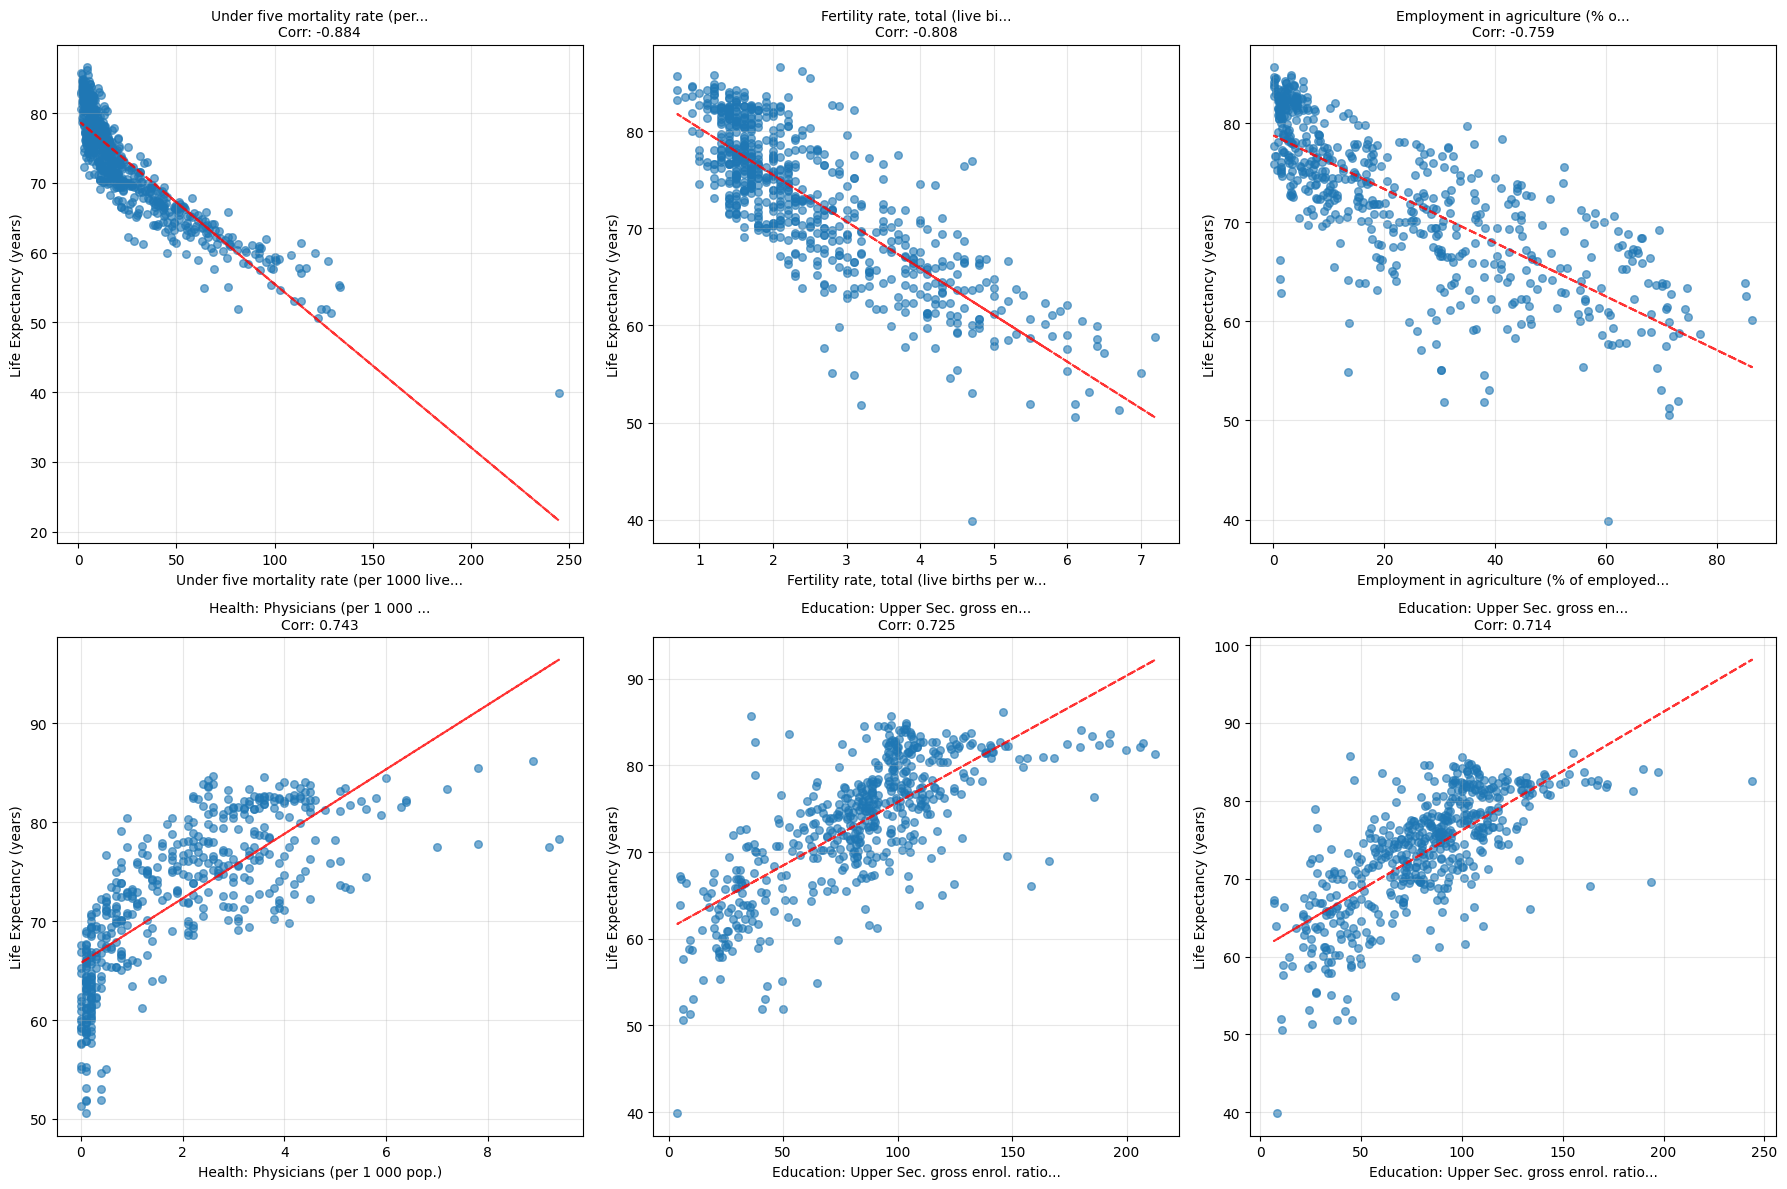

Key Relationship Insights:
Strongest Positive Correlation: Health: Physicians (per 1 000 pop.)
  - Correlation: +0.743
  - Sample size: 475 countries

Strongest Negative Correlation: Under five mortality rate (per 1000 live births)
  - Correlation: -0.884
  - Sample size: 690 countries


In [14]:
# Scatter plots for top correlated features
top_corr_features = [item[0] for item in correlations[:6]]  # Top 6 correlations

plt.figure(figsize=(18, 12))

for i, feature in enumerate(top_corr_features):
    plt.subplot(2, 3, i+1)
    
    # Create clean data for plotting
    clean_data = df[[feature, "Life expectancy at birth - average"]].dropna()
    
    if len(clean_data) > 0:
        plt.scatter(clean_data[feature], clean_data["Life expectancy at birth - average"], 
                   alpha=0.6, s=30)
        
        # Add trend line
        z = np.polyfit(clean_data[feature], clean_data["Life expectancy at birth - average"], 1)
        p = np.poly1d(z)
        plt.plot(clean_data[feature], p(clean_data[feature]), "r--", alpha=0.8)
        
        # Calculate R²
        correlation = clean_data[feature].corr(clean_data["Life expectancy at birth - average"])
        plt.title(f'{feature[:30]}...\nCorr: {correlation:.3f}', fontsize=10)
        plt.xlabel(feature[:40] + ('...' if len(feature) > 40 else ''))
        plt.ylabel('Life Expectancy (years)')
        
        # Add some styling
        plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, 'No complete data', ha='center', va='center')
        plt.title(f'{feature} (No Data)')

plt.tight_layout()
plt.show()

# Analysis of key relationships
print("Key Relationship Insights:")
print("=" * 50)

# Get the top positive and negative correlations
if len(positive_corrs) > 0:
    best_pos = positive_corrs[0]
    print(f"Strongest Positive Correlation: {best_pos[0]}")
    print(f"  - Correlation: +{best_pos[1]:.3f}")
    print(f"  - Sample size: {best_pos[2]} countries")

if len(negative_corrs) > 0:
    best_neg = negative_corrs[0]
    print(f"\nStrongest Negative Correlation: {best_neg[0]}")
    print(f"  - Correlation: {best_neg[1]:.3f}")
    print(f"  - Sample size: {best_neg[2]} countries")

## 4. Feature Engineering and Data Preparation
Let's prepare the data for regression by selecting relevant features and handling missing values.

In [16]:
# Feature selection for regression based on correlation analysis
# Select features with high correlation and good completeness
selected_features = []

# Add the top correlated features (both positive and negative)
for feature, corr, n_obs in correlations[:15]:  # Top 15 by absolute correlation
    if abs(corr) > 0.3 and n_obs > 100:  # Strong correlation and sufficient data
        selected_features.append(feature)

# Add some potentially important economic and health indicators if not already included
additional_features = [
    'GDP per capita (current US$)',
    'Health: Government expenditure (% of GDP)',
    'Education: Government expenditure (% of GDP)',
    'Urban population (% of total population)',
    'Employment in agriculture (% of employed)',
    'Employment in services (% employed)',
    'Under five mortality rate (per 1000 live births)',
    'Fertility rate, total (live births per woman)'
]

for feature in additional_features:
    if feature in df.columns and feature not in selected_features:
        # Check if it has reasonable completeness and correlation
        clean_data = df[[feature, "Life expectancy at birth - average"]].dropna()
        if len(clean_data) > 50:  # At least 50 observations
            corr = clean_data[feature].corr(clean_data["Life expectancy at birth - average"])
            if abs(corr) > 0.2:  # At least moderate correlation
                selected_features.append(feature)

print(f"Selected {len(selected_features)} features for regression analysis:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

# Create dataset for regression
df_regression = df[selected_features + ["Life expectancy at birth - average"]].copy()

# Remove rows with missing target variable
df_regression = df_regression.dropna(subset=["Life expectancy at birth - average"])

print(f"\nDataset shape after removing missing targets: {df_regression.shape}")
print(f"\nMissing values per feature:")
missing_summary = df_regression.isnull().sum().sort_values(ascending=False)
print(missing_summary[missing_summary > 0])

# Calculate completeness for each feature
completeness = (df_regression.count() / len(df_regression) * 100).round(1)
print(f"\nFeature completeness (%):")
for feature, comp in completeness.items():
    if feature != "Life expectancy at birth - average":
        print(f"{feature}: {comp:.1f}%")

Selected 15 features for regression analysis:
 1. Under five mortality rate (per 1000 live births)
 2. Fertility rate, total (live births per woman)
 3. Employment in agriculture (% of employed)
 4. Health: Physicians (per 1 000 pop.)
 5. Education: Upper Sec. gross enrol. ratio - Female (per 100 pop.)
 6. Education: Upper Sec. gross enrol. ratio - Male (per 100 pop.)
 7. Employment in services (% employed)
 8. Economy: Agriculture (% of Gross Value Added)
 9. GDP per capita (current US$)
10. Urban population (% of total population)
11. Economy: Services and other activity (% of GVA)
12. Urban population growth rate (average annual %)
13. Employment in industry (% of employed)
14. Population growth rate (average annual %)
15. Education: Primary gross enrol. ratio - Female/Education: Primary gross enrol. ratio - Male Ratio

Dataset shape after removing missing targets: (690, 16)

Missing values per feature:
Urban population growth rate (average annual %)                                 

Complete cases dataset: (147, 16)
High completeness features (12): ['Under five mortality rate (per...', 'Fertility rate, total (live bi...', 'Employment in agriculture (% o...', 'Education: Upper Sec. gross en...', 'Education: Upper Sec. gross en...', 'Employment in services (% empl...', 'Economy: Agriculture (% of Gro...', 'GDP per capita (current US$)', 'Economy: Services and other ac...', 'Employment in industry (% of e...', 'Population growth rate (averag...', 'Education: Primary gross enrol...']
High completeness dataset: (690, 13)
Most complete features (>90.0% complete): ['Under five mortality rate (per...', 'Fertility rate, total (live bi...', 'GDP per capita (current US$)', 'Economy: Services and other ac...', 'Population growth rate (averag...']
Most complete dataset: (630, 6)


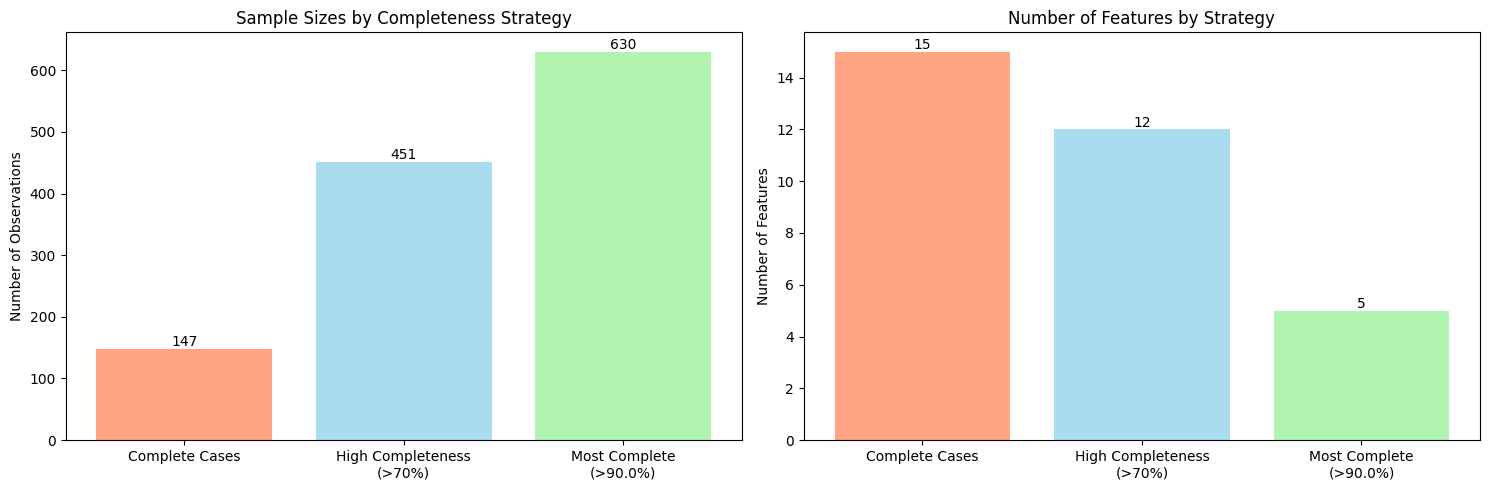


Multicollinearity Analysis:
High correlation pairs (potential multicollinearity):
  Under five mortality rate <-> Fertility rate, total (li | 0.846

Regression strategy recommendations:
1. Complete cases: 147 samples, 15 features - Most robust
2. High completeness: 451 samples, 12 features - Balanced approach
3. Most complete: 630 samples, 5 features - Maximum sample size


In [17]:
# Create different datasets based on completeness requirements
# Option 1: Use only complete cases (might reduce sample size significantly)
df_complete = df_regression.dropna()
print(f"Complete cases dataset: {df_complete.shape}")

# Option 2: Use features with >70% completeness
high_complete_features = [feature for feature in selected_features 
                         if (df_regression[feature].count() / len(df_regression)) > 0.7]
high_complete_features.append("Life expectancy at birth - average")
df_high_complete = df_regression[high_complete_features].copy()
print(f"High completeness features ({len(high_complete_features)-1}): {[f[:30]+'...' if len(f) > 30 else f for f in high_complete_features[:-1]]}")
print(f"High completeness dataset: {df_high_complete.shape}")

# Option 3: Most complete features for maximum sample size
completeness_threshold = 0.9
most_complete_features = [feature for feature in selected_features 
                         if (df_regression[feature].count() / len(df_regression)) > completeness_threshold]
most_complete_features.append("Life expectancy at birth - average")

if len(most_complete_features) < 6:  # If too few features, lower threshold
    completeness_threshold = 0.8
    most_complete_features = [feature for feature in selected_features 
                             if (df_regression[feature].count() / len(df_regression)) > completeness_threshold]
    most_complete_features.append("Life expectancy at birth - average")

df_most_complete = df_regression[most_complete_features].dropna()
print(f"Most complete features (>{completeness_threshold*100}% complete): {[f[:30]+'...' if len(f) > 30 else f for f in most_complete_features[:-1]]}")
print(f"Most complete dataset: {df_most_complete.shape}")

# Visualize sample sizes vs feature completeness tradeoff
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Sample sizes comparison
datasets = ['Complete Cases', f'High Completeness\n(>70%)', f'Most Complete\n(>{completeness_threshold*100}%)']
sample_sizes = [df_complete.shape[0], df_high_complete.dropna().shape[0], df_most_complete.shape[0]]
feature_counts = [len(selected_features), len(high_complete_features)-1, len(most_complete_features)-1]

ax1.bar(datasets, sample_sizes, alpha=0.7, color=['coral', 'skyblue', 'lightgreen'])
ax1.set_title('Sample Sizes by Completeness Strategy')
ax1.set_ylabel('Number of Observations')
for i, v in enumerate(sample_sizes):
    ax1.text(i, v + 5, str(v), ha='center')

ax2.bar(datasets, feature_counts, alpha=0.7, color=['coral', 'skyblue', 'lightgreen'])
ax2.set_title('Number of Features by Strategy')
ax2.set_ylabel('Number of Features')
for i, v in enumerate(feature_counts):
    ax2.text(i, v + 0.1, str(v), ha='center')

plt.tight_layout()
plt.show()

# Feature correlation analysis for multicollinearity
print(f"\nMulticollinearity Analysis:")
print("=" * 40)

# Check for highly correlated features (potential multicollinearity)
if len(df_most_complete.select_dtypes(include=[np.number]).columns) > 2:
    feature_corr_matrix = df_most_complete.select_dtypes(include=[np.number]).corr()
    
    # Find pairs of highly correlated features (excluding target variable)
    feature_cols = [col for col in feature_corr_matrix.columns if col != "Life expectancy at birth - average"]
    high_corr_pairs = []
    
    for i in range(len(feature_cols)):
        for j in range(i+1, len(feature_cols)):
            corr_val = feature_corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:  # High correlation threshold
                high_corr_pairs.append((feature_cols[i], feature_cols[j], corr_val))
    
    if high_corr_pairs:
        print("High correlation pairs (potential multicollinearity):")
        for feat1, feat2, corr in high_corr_pairs:
            print(f"  {feat1[:25]:<25} <-> {feat2[:25]:<25} | {corr:.3f}")
    else:
        print("No high correlation pairs found (good for regression)")

print(f"\nRegression strategy recommendations:")
print(f"1. Complete cases: {df_complete.shape[0]} samples, {len(selected_features)} features - Most robust")
print(f"2. High completeness: {df_high_complete.dropna().shape[0]} samples, {len(high_complete_features)-1} features - Balanced approach")  
print(f"3. Most complete: {df_most_complete.shape[0]} samples, {len(most_complete_features)-1} features - Maximum sample size")

## 5. EDA Summary and Regression Insights

### Key Findings:

1. **Target Variable**: Life expectancy ranges from ~50-85 years with relatively normal distribution
2. **Most Predictive Features**: Features strongly correlated with life expectancy (both positive and negative)
3. **Data Quality**: Missing data patterns analyzed for informed feature selection
4. **Regression Strategy Options**: Multiple datasets prepared based on completeness requirements

### Recommendations for Regression:
1. **Feature Selection**: Focus on features with |correlation| > 0.3 and sufficient data completeness
2. **Sample Size vs Features Trade-off**: Balance between model complexity and available data
3. **Missing Data Handling**: Consider imputation strategies for important features
4. **Multicollinearity**: Check for highly correlated predictors that might cause issues

In [2]:
# Save the prepared datasets for regression modeling
import os

# Create a data directory if it doesn't exist
os.makedirs('../data/processed/regression', exist_ok=True)

# Save the different datasets
df_complete.to_csv('../data/processed/regression/life_exp_complete_cases.csv', index=False)
df_high_complete.dropna().to_csv('../data/processed/regression/life_exp_balanced.csv', index=False)
df_most_complete.to_csv('../data/processed/regression/life_exp_max_samples.csv', index=False)

print("Regression datasets saved:")
print(f"- Complete cases: ../data/processed/regression/life_exp_complete_cases.csv ({df_complete.shape})")
print(f"- Balanced approach: ../data/processed/regression/life_exp_balanced.csv ({df_high_complete.dropna().shape})")
print(f"- Maximum samples: ../data/processed/regression/life_exp_max_samples.csv ({df_most_complete.shape})")

# Display final dataset preview
print("\nBalanced dataset preview (recommended for regression):")
balanced_data = df_high_complete.dropna()
print(balanced_data.head())
print(f"\nFinal balanced dataset shape: {balanced_data.shape}")

# Show final correlation summary for selected features
print(f"\nFinal Feature-Target Correlations in Balanced Dataset:")
print("=" * 55)
target_correlations = []
for feature in balanced_data.columns:
    if feature != "Life expectancy at birth - average":
        corr = balanced_data[feature].corr(balanced_data["Life expectancy at birth - average"])
        target_correlations.append((feature, corr))

target_correlations.sort(key=lambda x: abs(x[1]), reverse=True)
for i, (feature, corr) in enumerate(target_correlations):
    direction = "↑" if corr > 0 else "↓"
    print(f"{i+1:2d}. {feature[:45]:<45} | {direction} {corr:6.3f}")

# Basic statistics of the target variable in final dataset
print(f"\nTarget Variable Statistics in Balanced Dataset:")
print(f"Mean: {balanced_data['Life expectancy at birth - average'].mean():.2f} years")
print(f"Std: {balanced_data['Life expectancy at birth - average'].std():.2f} years")
print(f"Min: {balanced_data['Life expectancy at birth - average'].min():.2f} years")
print(f"Max: {balanced_data['Life expectancy at birth - average'].max():.2f} years")
print(f"Range: {balanced_data['Life expectancy at birth - average'].max() - balanced_data['Life expectancy at birth - average'].min():.2f} years")

NameError: name 'df_complete' is not defined